# MCMC1.5: How to Plot

## Plots.jl

In Julia, the most general framework for plotting is Plots.jl, which includes many backends. If you are used to Python, then Plots.jl should be overkill. Just call PyPlot.jl instead.

In [1]:
using Plots
backend_name()

:none

Of course, PyPlot is also included in Plots.jl. The default is GR backend.

## PyPlot backend

In [2]:
pyplot()
backend_name()

:pyplot

The method `pyplot` will switch to the PyPlot.jl. This is for a Python user. I recommend GR or PlotlyJS. Especially, PlotlyJS has many interactive features.

## PlotlyJS backend

PlotlyJS is faster but unstable. Sometimes it is difficult to build PlotlyJS while you are adding PlotlyJS.jl package.

In [4]:
plotlyjs()
plot(x -> x ^ 2)

<!DOCTYPE html>
 
 
 Plots.jl

## GR backend

If you do not need any interactive features, the first choice is the GR backend, which is fast and very stable. You can switch to gr by the method `gr`.

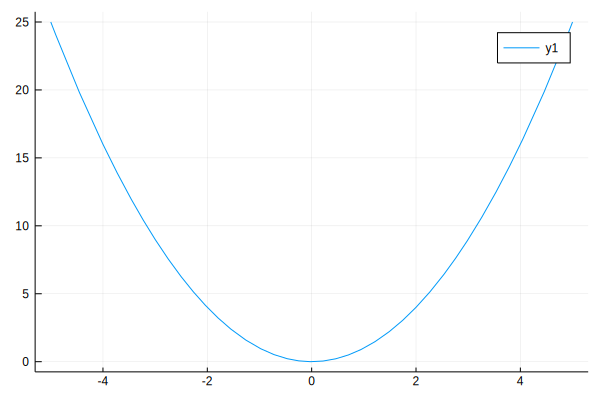

In [5]:
gr()
plot(x -> x ^ 2)

`plot!` will add another graph.

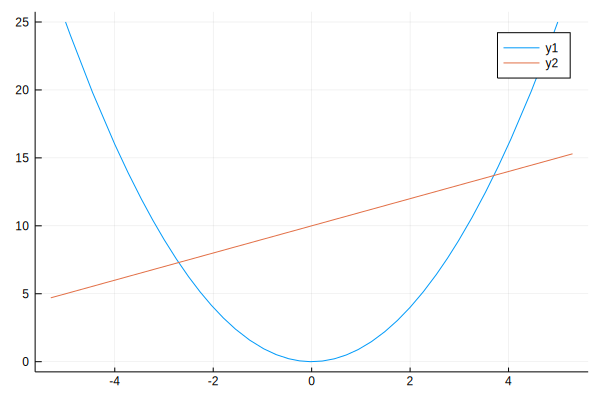

In [6]:
plot!(x -> x + 10)

For the speed test, see https://github.com/albi3ro/Plots.jl_Examples.

## Histogram

To see statistics graphically, you should check its histogram first.

In [8]:
using ResumableFunctions
@resumable function Ising1D()::Float64
    N = 1000
    σ = ones(Int64, N)
    β = 1.0
    step = 1
    while true
        for i in 1 : N
            j = rand(1 : N)
            ΔβE = 2β * σ[j] * (σ[mod1(j + 1, N)] + σ[mod1(j - 1, N)])
            -ΔβE > log(rand()) && (σ[j] = -σ[j])
        end
        if step > 10000
            @yield sum(σ) / N
        end
        step += 1
    end
end

Ising1D (generic function with 1 method)

For details of this code, see MCMC2.0 first. Let's just use the fact that `Ising1D()` returns an iterator, which iteratively produces magnetization samples of the 1D Ising model.

In [9]:
magnetization = Iterators.take(Ising1D(), 10000)

Base.Iterators.Take{var"##256"}(var"##256"(0x00, 6, #undef, 6, 6:5073656304, 5178137952, 2.5067191363e-314, 2.2832232846e-314, 4621295392, 4621295408, nothing, 257), 10000)

`Iterators.take` will take the first 10000 samples of the magnetization. If you want them in the form of a vector, just collect. Isn't it cool? Note that currently the first part of iteration was discarded inside `Ising1D`, but you can discard them afterwards by `Iterators.drop`.

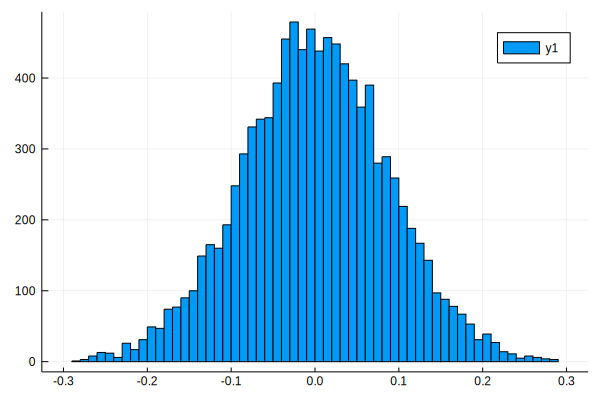

In [10]:
Mz = collect(magnetization)
histogram(Mz)

If it looks wierd, you can change binning.

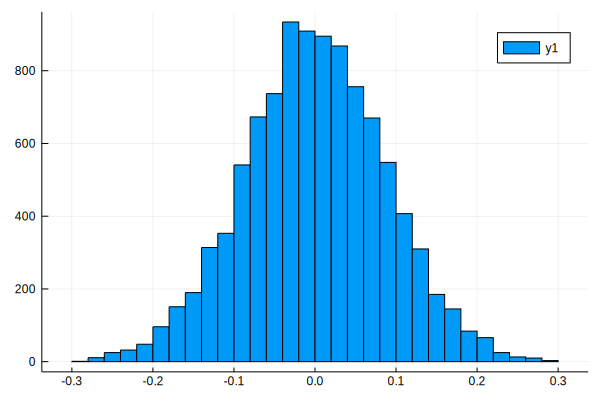

In [11]:
histogram(Mz, bins = 30)

## Scatter plot

The histogram was very easy. The scatter plot is easier.

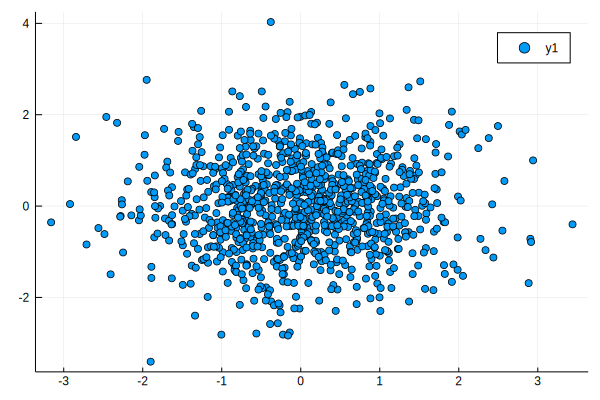

In [12]:
x = randn(1000)
y = randn(1000)
scatter(x, y)

This is a plot without correlation. In the correlated case,

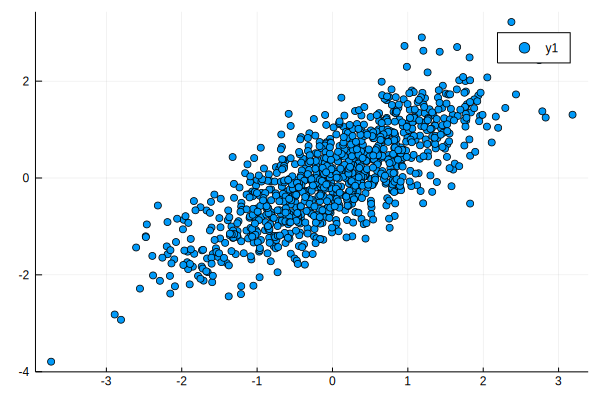

In [13]:
using Distributions
z = rand(MvNormal([0.0, 0.0], [1.0 0.8; 0.8 1.0]), 1000)
scatter(z[1, :], z[2, :])

Note that a distribution itself can be plotted.

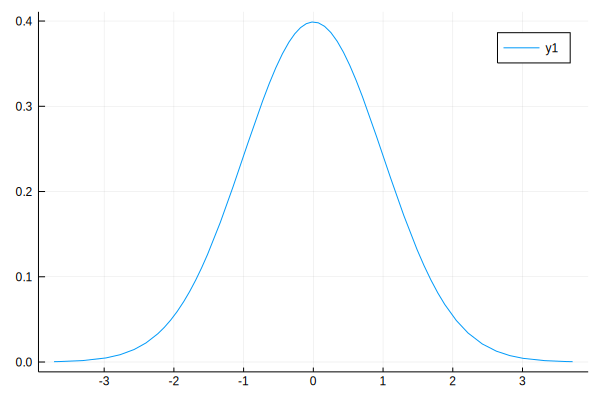

In [15]:
using StatsPlots
plot(Normal(0.0, 1.0))

## Discrete distributions

### Discrete exponential distribution

So far, in this notebook we have treated continuous (or pseudo-continuous) distributions. In physics a crazy discrete distribution sometimes appears, especially when the number of flavors is large. Generating such distributions is not always easy, so I will show how. Here's a discrete version of the exponential distribution.

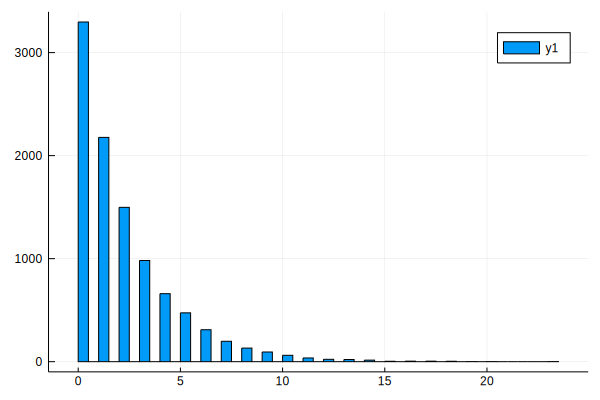

In [16]:
"""
Sample a natural number l from p(l) = exp(-ε l)

based on von Neumann's algorithm
"""
function discreteexponential(ε::Float64)::Int64
    if ε > 1.0
        throw(DomainError())
        return 0
    end
    l = 0
    while true
        Uold = ε
        Unew = rand()
        n = 1
        while Unew < Uold
            n += 1
            Uold = Unew
            Unew = rand()
        end
        if n & 1 == 0
            break
        end
        l += 1
    end
    l
end
de = [discreteexponential(0.4) for i in 1 : 10000]
histogram(de)

Here I used von Neumann's algorithm. Check http://exrandom.sourceforge.net/ for more details.

### Poisson distribution

Nothing to say about this distribution.

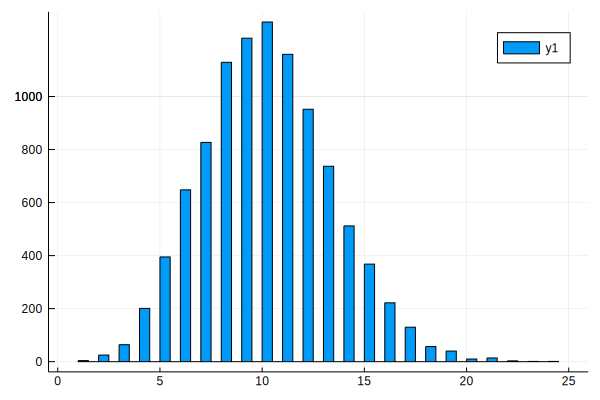

In [17]:
"""
Generate a Poisson distribution by Knuth's algorithm
"""
function Poisson(λ::Float64)::Int64
    p = exp(λ) * rand()
    k = 0
    while p > 1.0
        p *= rand()
        k += 1
    end
    k
end
po = [Poisson(10.0) for i in 1 : 10000]
histogram(po)

Note that there are many efficient algorithms for a large $\lambda$.
https://www.johndcook.com/blog/2010/06/14/generating-poisson-random-values/

### Discrete normal distribution

This is tricky. Based on von Neumann's algorithm.

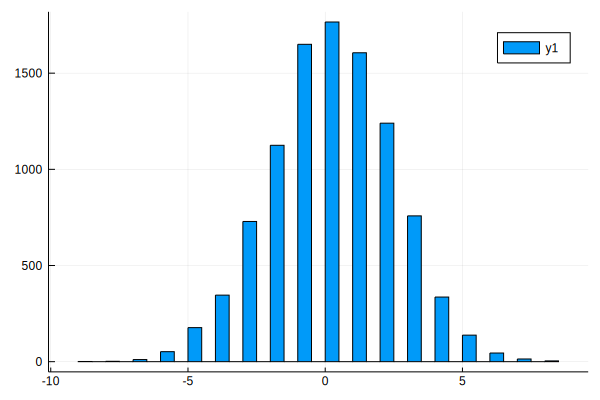

In [18]:
"""
Sample an integer l from p(l) = exp(-ε l²)

based on arXiv:1303.6257
"""
function discretenormal(ε::Float64)::Int64
    s = 1
    l = 0
    while true
        l = discreteexponential(ε)
        while rand() > exp(-ε * (l * (l - 1)))
            l = discreteexponential(ε)
        end
        s = rand([-1, 1])
        if (l != 0) || (s != -1)
            break
        end
    end
    l * s
end
dn = [discretenormal(0.1) for i in 1 : 10000]
histogram(dn)

**Exercise**: Rewrite these functions using recursion.

## Tips: animation

~ under construction ~